# 0 - Context
---
The is related to a restaurant located at the South of Brasil.

This dataset is combining several variables from different nature, such as: Customer, Whether, Sales History, Competitors and more.

The idea behind is to aggregate on a singular `dataset.csv`, all the necessary information to predict the next day sales (VENDAS)

# 1 - Evaluation 
---
RMSE (with or without cross validation)

MAE (with or without cross validation)

# 2 - Installing Kernal Dependencies

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


# 3 - Reading CSV

---

Here we are reading the dataset and adding a *df* variable

It is good to notice that the `dataset.csv` has passed through the **OneHotEncoding** technique

In [3]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
pd.set_option('display.max_rows', 500)

# 4 - Pre processing the Dataset

---

Here we are adding some new columns which may increase the model perfomance

In [4]:
import math

def get_vendas_ontem(df):
    first_row = 1
    df_temp = df['VENDAS'].shift(1)
    df_temp[0:first_row] = df[0:first_row]['VENDAS']
    
    for i in range(len(df_temp)):
        row_value = df_temp[i]
        inner_index = i
        while row_value == 0 or math.isnan(row_value):
            inner_index = inner_index - 1
            row_value = df_temp[inner_index]

        df_temp[i] = row_value.round().astype(int)
    return df_temp

df.insert(loc=20, column='VENDAS_ONTEM', value=(get_vendas_ontem(df)))

df['DATA'] = (pd.to_datetime(df['DATA'], dayfirst=True))

# 5 - Removing Outliers

---

Here we are removing the records which are appearing less than 3% (the outliers)

In [5]:
df = df.query('VENDAS < 200 and VENDAS > 70')
df = df.query('FECHADO == 0 and ABERTO == 1')

# 6 - Dropping Columns

---

Here we are removing the columns that are ambiguos

In [6]:
import numpy as np

df = df.drop(columns=['FECHADO', 'ABERTO', 'DS', 'DATA_NAO_FESTIVA', 'BAIXA_TEMPORADA', 'SEMANA_DE_NAO_PAGAMENTO', 'NAO_FERIADO'])

# saving variable for later
all_columns = np.array(df.columns)

# 7 - Exploratory Data Analysis (EDA)
---
The main idea here is to investigate and get to know better our dataset

## 7.1 - Basic 

Here are looking for IsNull & IsNA & Checking the Dataset structure


In [7]:
print(f'Does the Dataset has null values?: {df.isnull().values.any()}')
print(f'Does the Dataset has N/A values?: {df.isna().values.any()}')
print(f'What is the dataset format?: {df.shape}')
df.info()
df

Does the Dataset has null values?: False
Does the Dataset has N/A values?: False
What is the dataset format?: (715, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 751
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA                  715 non-null    datetime64[ns]
 1   VENDAS                715 non-null    int64         
 2   FDS                   715 non-null    int64         
 3   DATA_FESTIVA          715 non-null    int64         
 4   VESPERA_DATA_FESTIVA  715 non-null    int64         
 5   POS_DATA_FESTIVA      715 non-null    int64         
 6   FERIADO               715 non-null    int64         
 7   SEMANA_PAGAMENTO      715 non-null    int64         
 8   ALTA_TEMPORADA        715 non-null    int64         
 9   QTD_CONCORRENTES      715 non-null    int64         
 10  PRECIPITACAO          715 non-null    int64         
 11  TEMPERATURA     

,DATA,VENDAS,FDS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,FERIADO,SEMANA_PAGAMENTO,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE,VENDAS_ONTEM
0,2018-02-14,132,0,0,0,1,0,0,0,7,5,30,70,132.0
1,2018-02-15,149,0,0,0,1,0,0,0,7,5,30,65,132.0
2,2018-02-16,130,0,0,0,0,0,0,0,7,5,35,65,149.0
3,2018-02-17,174,1,0,0,0,0,0,0,7,5,35,70,130.0
4,2018-02-18,185,1,0,0,0,0,0,0,7,5,35,60,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2020-03-01,87,1,0,0,0,0,0,1,13,5,35,70,117.0
747,2020-03-02,99,0,0,0,0,0,0,1,13,5,30,70,87.0
749,2020-03-04,98,0,0,0,0,0,0,1,13,5,30,70,70.0
750,2020-03-05,121,0,0,0,0,0,1,1,13,5,30,70,98.0


## 7.2 - Overview

Here are getting to know more about the whole period, the semester, the standard deviation and etc.

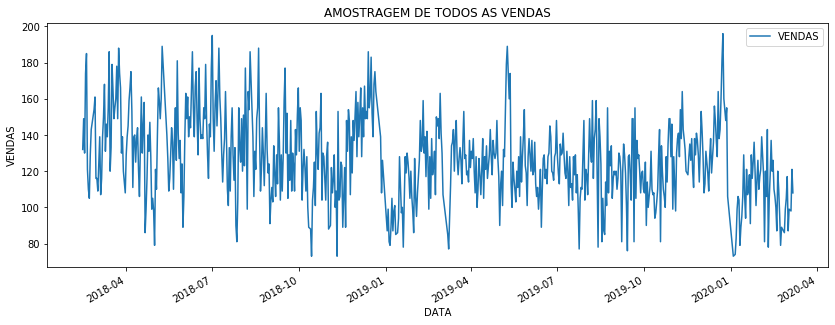

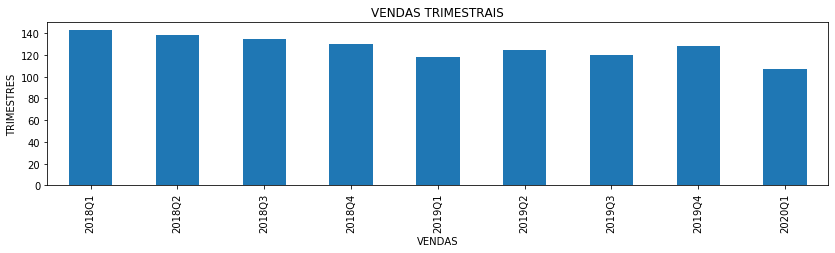

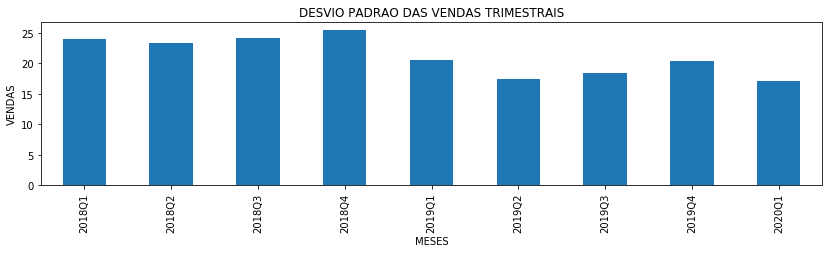

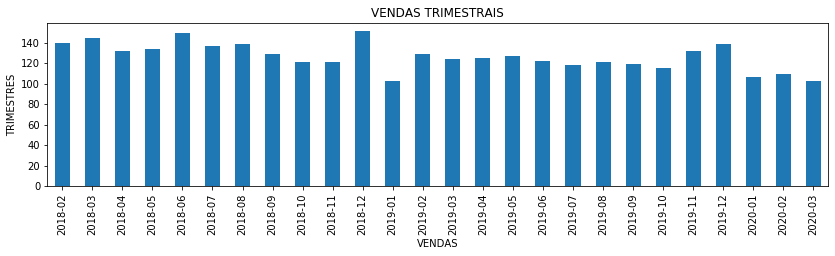

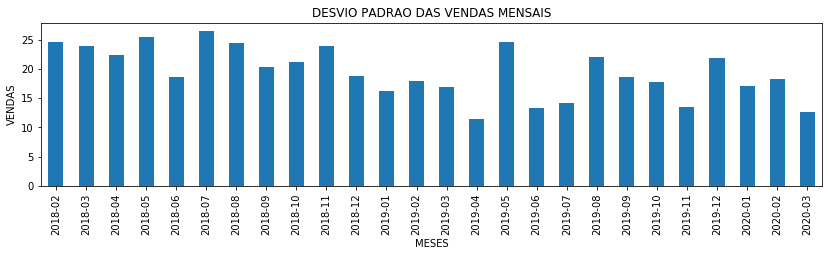

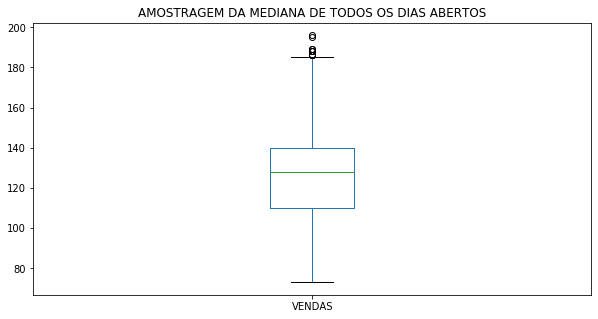

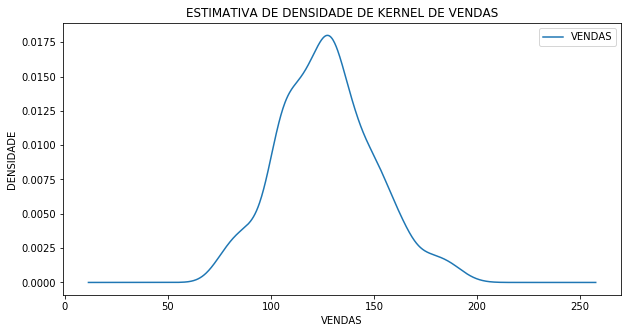

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = df.plot(y=['VENDAS'], x='DATA', figsize=(14, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS AS VENDAS')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()    

df_quarter = pd.DataFrame({'DATA': pd.to_datetime(df['DATA']), 'TEMPERATURA': df['TEMPERATURA'], 'VENDAS': df['VENDAS']})

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS TRIMESTRAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS MENSAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

## 7.3 - Features & Correlation

Here we are checking what is the correlatio between a feature and our target variable, to check how it is influence

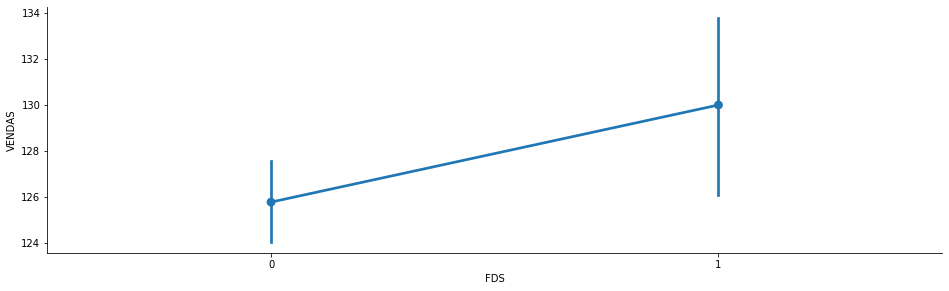

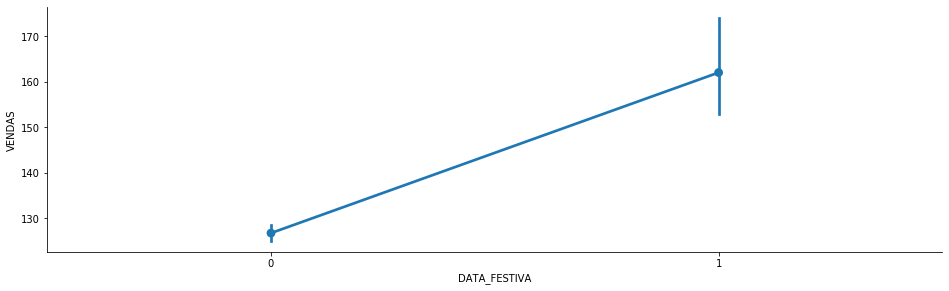

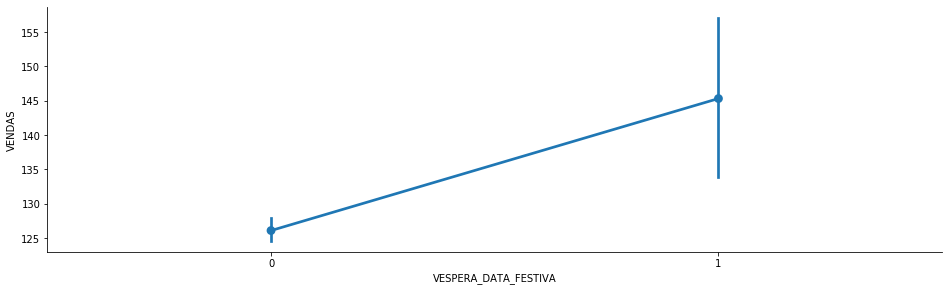

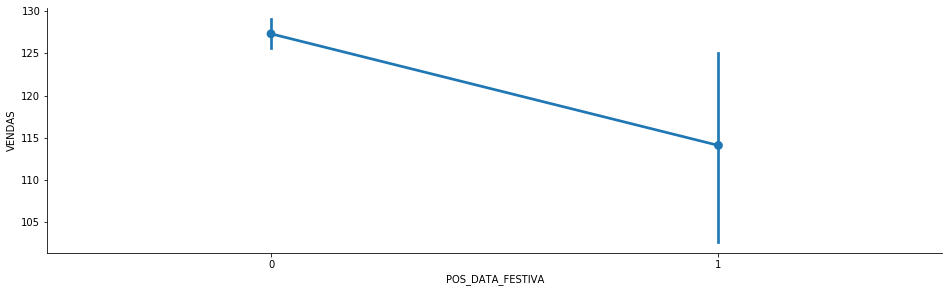

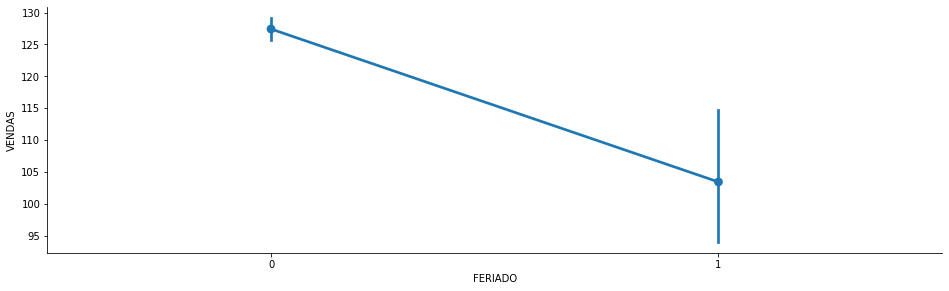

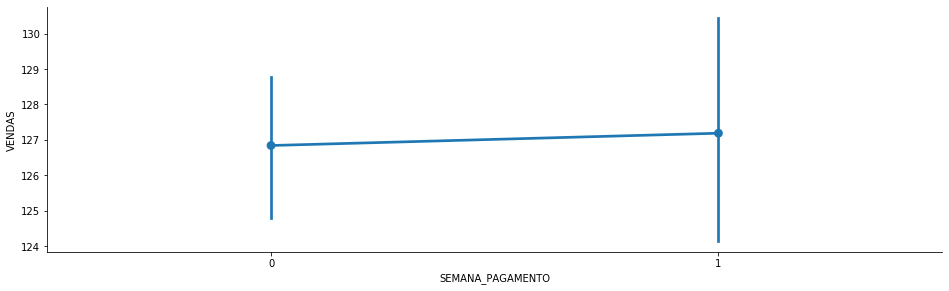

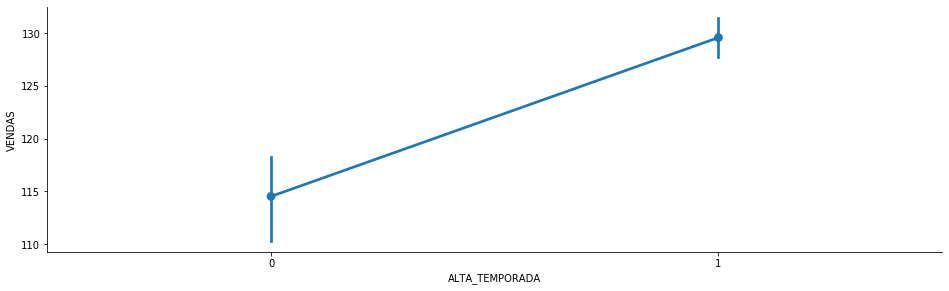

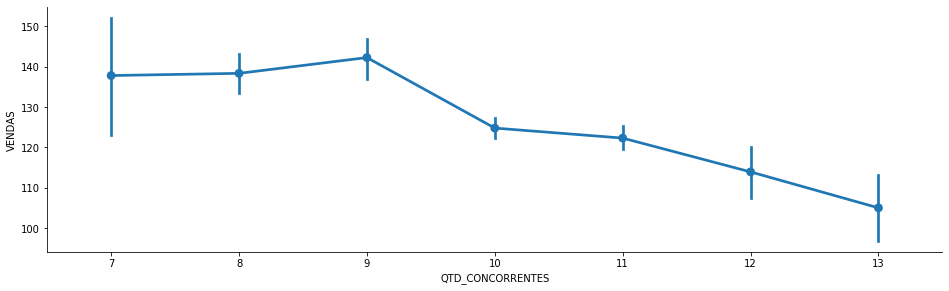

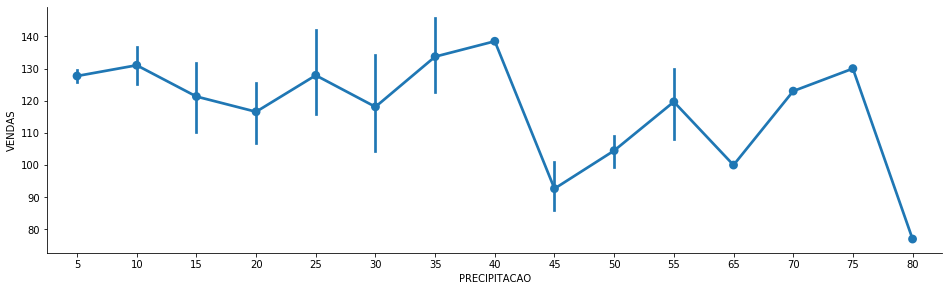

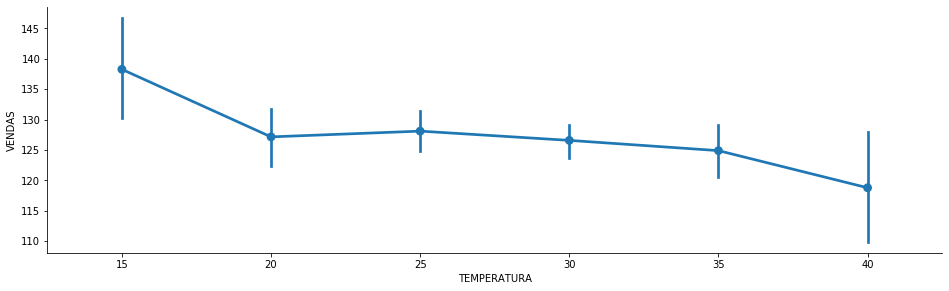

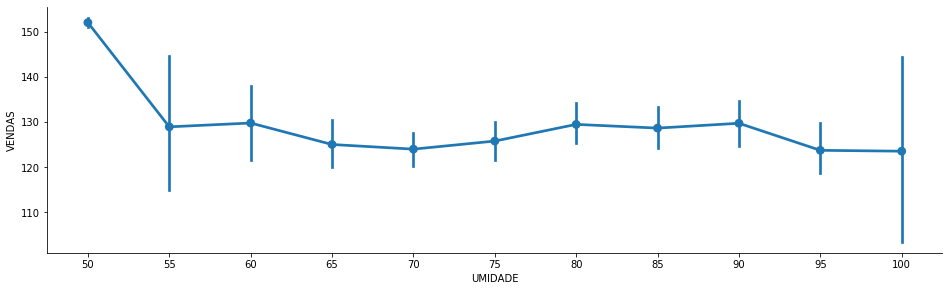

In [9]:
df_scatter = df.sort_values(by=['VENDAS'], ascending=True)

c = sns.catplot('FDS', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('VESPERA_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('POS_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('FERIADO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('SEMANA_PAGAMENTO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('ALTA_TEMPORADA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('QTD_CONCORRENTES', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('PRECIPITACAO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('TEMPERATURA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('UMIDADE', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

# 8 - LSTM Hypothesis
---
Since LSTM works well with time-series-like dataset, we will use it

## 8.1 - Permutation Importance

Here we are checking what are the most important features for the LSTM algorithm


In [10]:
import numpy as np
import eli5

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from eli5.sklearn import PermutationImportance

# creating feature dataset
features_to_drop_default = ['DATA', 'VENDAS']
features_to_drop_from_feature_analysis = ['SEMANA_PAGAMENTO', 'PRECIPITACAO']
features_to_drop_from_feature_importance = ['TEMPERATURA', 'POS_DATA_FESTIVA', 'FDS', 'VESPERA_DATA_FESTIVA', 'ALTA_TEMPORADA']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis + features_to_drop_from_feature_importance

# creating target dataset
outputs_to_drop = ['DATA', 'FDS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'FERIADO', 'SEMANA_PAGAMENTO', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_ONTEM']

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_lstm = df.drop(columns=features_to_drop)
y_lstm = df.drop(columns=outputs_to_drop)

# save features names
features = X_lstm.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8.2 - Feature Engineering

Here we are scaling / normalizing our features leftovers

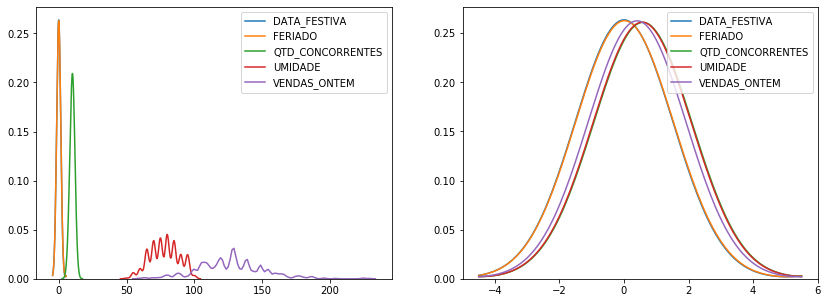

In [11]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# plot scaling
scaled_X_train = pd.DataFrame(X_train, columns=leftovers)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

for i in range(len(leftovers)):
    column = leftovers[i]
    sns.kdeplot(df[column], bw=1.5, ax=ax1)

for j in range(len(leftovers)):
    column = leftovers[j]
    sns.kdeplot(scaled_X_train[column], bw=1.5, ax=ax2)

plt.show()

## 8.3 - Model Creation, Fitting, Tunning & Prediction

Here we are creating our MLPRegressor model, tunning, fitting, predicting and ploting the results


RMSE: 17.30
MAE: 13.61
R2: -0.09


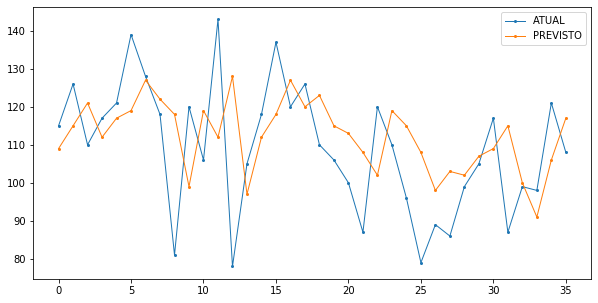

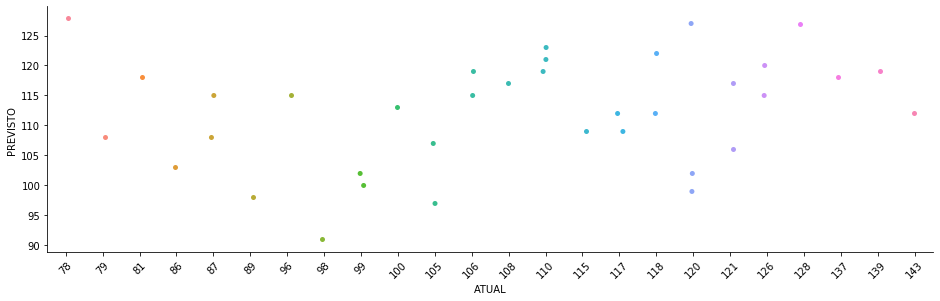

In [12]:
# imports
import seaborn as sns
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

# reshape to 3D
train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
train_y = np.array(y_train).reshape((y_train.shape[0], 1, y_train.shape[1]))
test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
sizee = (int(train_X.shape[2] - 1) * -1)

# model
def base_model():
    lstm = Sequential()
    lstm.add(LSTM(190, return_sequences=True))
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(190, return_sequences=True))
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(190, return_sequences=False))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1))
    lstm.compile(loss='mean_squared_error', optimizer='adam')
    return lstm
lstm = KerasRegressor(build_fn=base_model)

# manual training
lstm.fit(train_X, train_y, epochs=200, batch_size=20, shuffle=False, verbose=False)
y_pred_lstm = lstm.predict(test_X).round().astype(int)
y_pred_lstm = y_pred_lstm.reshape((y_pred_lstm.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], train_X.shape[2])) # train_x shape?????
rmse = metrics.mean_squared_error(y_test, y_pred_lstm, squared=False)
mae = metrics.mean_absolute_error(y_test, y_pred_lstm)
print(f'RMSE: %.2f' % rmse)
print(f'MAE: %.2f' % mae)
print(f'R2: %.2f' % metrics.r2_score(y_test, y_pred_lstm))

# plot
df1 = pd.DataFrame({'ATUAL': y_test.values.flatten(), 'PREVISTO': y_pred_lstm.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# scatter
c = sns.catplot('ATUAL', 'PREVISTO', data=pd.DataFrame({'PREVISTO': y_pred_lstm.flatten(), 'ATUAL': y_test.values.flatten() }))
c.set_xticklabels(rotation=45)
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

# 9 - GradientBoostingRegressor Hypothesis
---
Since GB works well with splitting the features and exploiting them, we will use it

## 9.1 - Permutation Importance

Here we are checking what are the most important features for the **GradientBoostingRegressor** algorithm


In [13]:
import numpy as np
import eli5

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from eli5.sklearn import PermutationImportance

################################################ 1st Round

# creating feature dataset
features_to_drop_default = ['DATA', 'VENDAS']
features_to_drop_from_feature_analysis = ['SEMANA_PAGAMENTO', 'PRECIPITACAO']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis 

# creating target dataset
outputs_to_drop = ['DATA', 'FDS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'FERIADO', 'SEMANA_PAGAMENTO', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_ONTEM']

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_gb = df.drop(columns=features_to_drop)
y_gb = df.drop(columns=outputs_to_drop)

# save features names
features = X_gb.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_gb, y_gb, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# permutation importance
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

################################################ 2nd Round

# creating feature dataset
features_to_drop_from_permutation = ['FDS', 'UMIDADE', 'TEMPERATURA', 'VESPERA_DATA_FESTIVA']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis + features_to_drop_from_permutation

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_gb = df.drop(columns=features_to_drop)
y_gb = df.drop(columns=outputs_to_drop)

# save features names
features = X_gb.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_gb, y_gb, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# permutation importance
nn = GradientBoostingRegressor()
nn.fit(X_train, y_train)
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

################################################ 3rd Round
# creating feature dataset
features_to_drop_from_permutation_2nd_round = ['POS_DATA_FESTIVA']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis + features_to_drop_from_permutation + features_to_drop_from_permutation + features_to_drop_from_permutation_2nd_round

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_gb = df.drop(columns=features_to_drop)
y_gb = df.drop(columns=outputs_to_drop)

# save features names
features = X_gb.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_gb, y_gb, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# permutation importance
nn = GradientBoostingRegressor()
nn.fit(X_train, y_train)
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.1350 ± 0.7636,VENDAS_ONTEM
0 ± 0.0000,QTD_CONCORRENTES
0 ± 0.0000,FERIADO
0 ± 0.0000,DATA_FESTIVA
-0.0026 ± 0.1631,ALTA_TEMPORADA


## 9.2 - Feature Engineering

Here we are scaling / normalizing our features leftovers

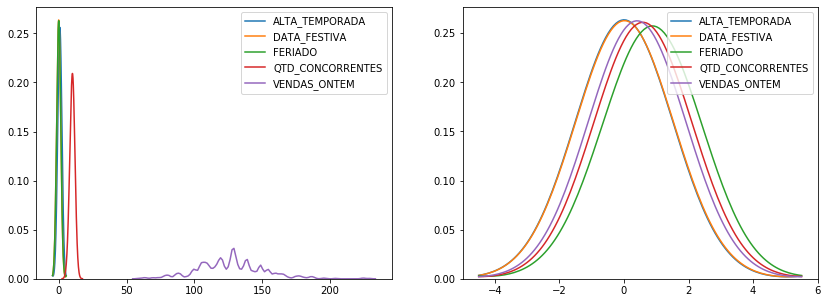

In [14]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# plot scaling
scaled_X_train = pd.DataFrame(X_train, columns=leftovers)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

for i in range(len(leftovers)):
    column = leftovers[i]
    sns.kdeplot(df[column], bw=1.5, ax=ax1)

for j in range(len(leftovers)):
    column = leftovers[j]
    sns.kdeplot(scaled_X_train[column], bw=1.5, ax=ax2)

plt.show()

## 9.3 - Model Creation, Fitting, Tunning & Prediction 

Here we are creating our GradientBoostingRegressor model, tunning, fitting, predicting and ploting the results 

RMSE (cross validation): 18.02
MAE (cross validation): 14.11
RMSE: 19.70
MAE: 15.19
R2: -0.41


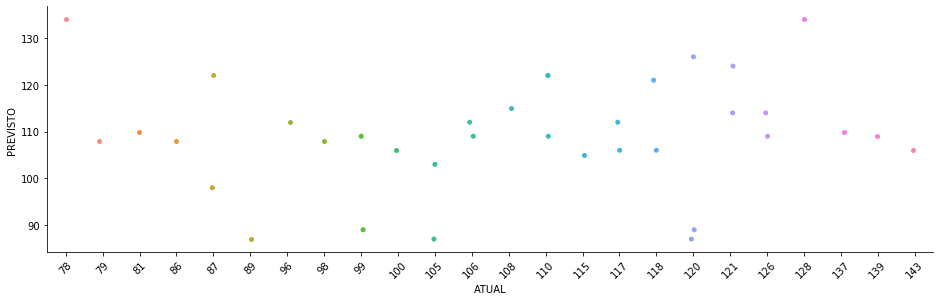

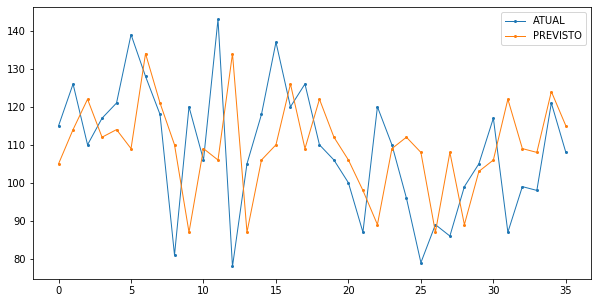

In [15]:
# imports
from sklearn.ensemble import GradientBoostingRegressor

# model
gb = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=25,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=21, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=139,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# cross validation
scores_rmse = cross_val_score(gb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores_mae = cross_val_score(gb, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(f'RMSE (cross validation): %.2f' % np.abs(scores_rmse).min())
print(f'MAE (cross validation): %.2f' % np.abs(scores_mae).min())

# manual training
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test).round().astype(int)
print(f'RMSE: %.2f' % metrics.mean_squared_error(y_test, y_pred_gb, squared=False))
print(f'MAE: %.2f' % metrics.mean_absolute_error(y_test, y_pred_gb))
print(f'R2: %.2f' % metrics.r2_score(y_test, y_pred_gb))

# scatter
c = sns.catplot('ATUAL', 'PREVISTO', data=pd.DataFrame({'PREVISTO': y_pred_gb.flatten(), 'ATUAL': y_test.values.flatten() }))
c.set_xticklabels(rotation=45)
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

# plot
df1 = pd.DataFrame({'ATUAL': y_test.values.flatten(), 'PREVISTO': y_pred_gb.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# 10 - MLPRegressor Hypothesis
---
Since MLP works well with several different features, we will use it

## 10.1 - Permutation Importance 

Here we are checking what are the most important features for the **MLPRegressor** algorithm


In [16]:
import numpy as np
import eli5

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from eli5.sklearn import PermutationImportance

################################################ 1st Round

# creating feature dataset
features_to_drop_default = ['DATA', 'VENDAS']
features_to_drop_from_feature_analysis = ['SEMANA_PAGAMENTO', 'PRECIPITACAO']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis 

# creating target dataset
outputs_to_drop = ['DATA', 'FDS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'FERIADO', 'SEMANA_PAGAMENTO', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_ONTEM']

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_mlp = df.drop(columns=features_to_drop)
y_mlp = df.drop(columns=outputs_to_drop)

# save features names
features = X_mlp.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# permutation importance
model = MLPRegressor()
model.fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

################################################ 2nd Round

# creating feature dataset
features_to_drop_from_permutation = ['QTD_CONCORRENTES', 'VESPERA_DATA_FESTIVA', 'FDS']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis + features_to_drop_from_permutation

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_mlp = df.drop(columns=features_to_drop)
y_mlp = df.drop(columns=outputs_to_drop)

# save features names
features = X_mlp.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# permutation importance
nn = MLPRegressor()
nn.fit(X_train, y_train)
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

################################################ 3rd Round
# creating feature dataset
features_to_drop_from_permutation_2nd_round = ['ALTA_TEMPORADA']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis + features_to_drop_from_permutation + features_to_drop_from_permutation + features_to_drop_from_permutation_2nd_round

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X_mlp = df.drop(columns=features_to_drop)
y_mlp = df.drop(columns=outputs_to_drop)

# save features names
features = X_mlp.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.05, random_state=1, shuffle=False)

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# permutation importance
nn = MLPRegressor()
nn.fit(X_train, y_train)
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.2756 ± 0.0881,TEMPERATURA
0.2094 ± 0.1253,UMIDADE
0.1326 ± 0.1965,VENDAS_ONTEM
0.0317 ± 0.1730,POS_DATA_FESTIVA
0 ± 0.0000,FERIADO
0 ± 0.0000,DATA_FESTIVA


## 10.2 - Feature Engineering 

Here we are scaling / normalizing our features leftovers

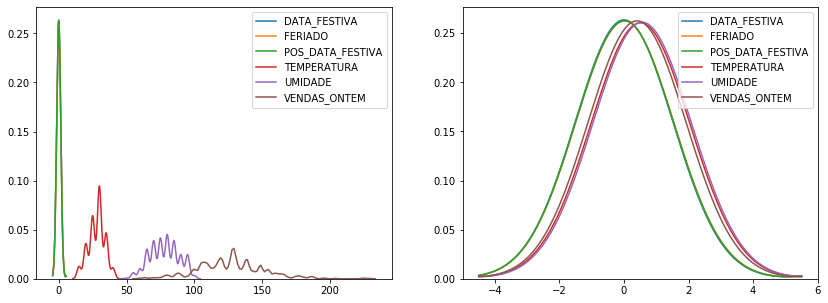

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# plot scaling
scaled_X_train = pd.DataFrame(X_train, columns=leftovers)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

for i in range(len(leftovers)):
    column = leftovers[i]
    sns.kdeplot(df[column], bw=1.5, ax=ax1)

for j in range(len(leftovers)):
    column = leftovers[j]
    sns.kdeplot(scaled_X_train[column], bw=1.5, ax=ax2)

plt.show()

## 10.3 - Model Creation, Fitting, Tunning & Prediction

Here we are creating our MLPRegressor model, tunning, fitting, predicting and ploting the results 

RMSE (cross validation): 17.45
MAE (cross validation): 13.92
RMSE: 19.53
MAE: 14.58
R2: -0.38


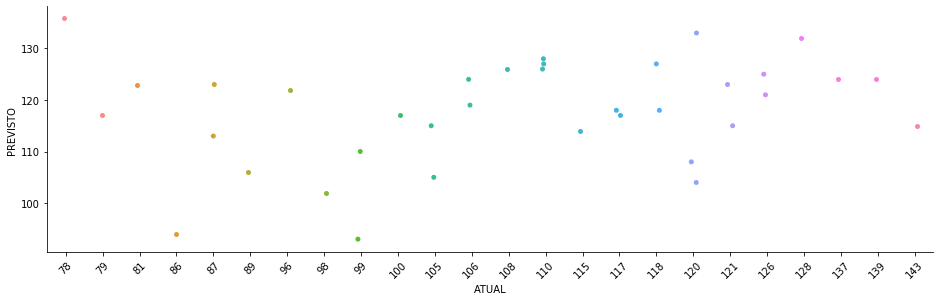

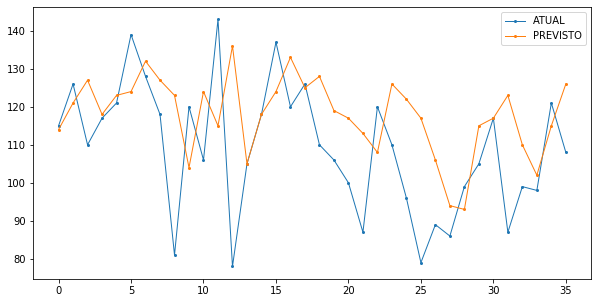

In [18]:
# imports
from sklearn.neural_network import MLPRegressor

# model
mlp = MLPRegressor(activation='identity', alpha=0.0001, batch_size=300, beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(149), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=False, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=True)

# cross validation
scores_rmse = cross_val_score(mlp, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores_mae = cross_val_score(mlp, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(f'RMSE (cross validation): %.2f' % np.abs(scores_rmse).min())
print(f'MAE (cross validation): %.2f' % np.abs(scores_mae).min())

# manual training
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test).round().astype(int)
print(f'RMSE: %.2f' % metrics.mean_squared_error(y_test, y_pred_mlp, squared=False))
print(f'MAE: %.2f' % metrics.mean_absolute_error(y_test, y_pred_mlp))
print(f'R2: %.2f' % metrics.r2_score(y_test, y_pred_mlp))

# scatter
c = sns.catplot('ATUAL', 'PREVISTO', data=pd.DataFrame({'PREVISTO': y_pred_mlp.flatten(), 'ATUAL': y_test.values.flatten() }))
c.set_xticklabels(rotation=45)
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

# plot
df1 = pd.DataFrame({'ATUAL': y_test.values.flatten(), 'PREVISTO': y_pred_mlp.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# 11 - Ensemble Technique

---

Lets combine our weak learners into a better one by joining all

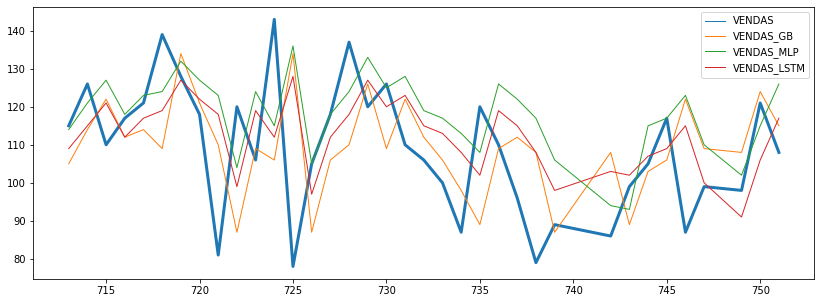

In [19]:
df_ensemble = pd.DataFrame()
df_ensemble.insert(loc=0, column='VENDAS', value=(y_test['VENDAS']))
df_ensemble.insert(loc=1, column='VENDAS_GB', value=(y_pred_gb))
df_ensemble.insert(loc=2, column='VENDAS_MLP', value=(y_pred_mlp))
df_ensemble.insert(loc=3, column='VENDAS_LSTM', value=(y_pred_lstm))

ax = df_ensemble.plot(figsize=(14, 5), linewidth=1)
for line in ax.get_lines():
    if line.get_label() == 'VENDAS':
        line.set_linewidth(3)
plt.show()

## 11.1 - Manually
---
Here we get the results from the 3 different algorithms and create new columns and dataset

In [20]:
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# creating feature dataset
features_to_drop_default = ['DATA', 'VENDAS']
features_to_drop_from_feature_analysis = ['SEMANA_PAGAMENTO', 'PRECIPITACAO']
features_to_drop = features_to_drop_default + features_to_drop_from_feature_analysis 

# creating target dataset
outputs_to_drop = ['DATA', 'FDS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'FERIADO', 'SEMANA_PAGAMENTO', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_ONTEM']

# columns considered by the model
leftovers = np.setdiff1d(all_columns, features_to_drop) 
X = df.drop(columns=features_to_drop)
y = df.drop(columns=outputs_to_drop)

# save features names
features = X.columns.values.tolist()

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1, shuffle=False)

# combining the predictions from previous results/models
X_test.insert(loc=10, column='VENDAS_GB', value=(y_pred_gb))
X_test.insert(loc=11, column='VENDAS_MLP', value=(y_pred_mlp))
X_test.insert(loc=12, column='VENDAS_LSTM', value=(y_pred_lstm))

# feature scaling
scaler = preprocessing.MinMaxScaler()
X_test = scaler.fit_transform(X_test)

## 11.2 - StackingRegressor

Here we are feeding the StackingRegressor Ensemble Algorithm with GP and MLP, adding a Meta Regressor as the SVR (Support Vector Machine) and checking the results

I have choosen the stacking because it accepts heterogeneous base models

⚠️ These EnsembleRegressors Techiniques will only work if the X_train has the same shape as X_test  ⚠️ (which they dont because i have added 3 columns from the previous models result)

In [21]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

# separar meus 95% de treino em
# 90% para treinar os base models
# 5% para treinar o meta model (validation)

svr_rbf = SVR(kernel='rbf')
stregr = StackingRegressor(regressors=[gb, mlp], meta_regressor=svr_rbf)
stregr.fit(X_train, y_train)
y_pred = stregr.predict(X_test).round().astype(int)
y_pred = y_pred.reshape(y_pred.shape[0], 1)
print(f'RMSE: %.2f' % metrics.mean_squared_error(y_test, y_pred, squared=False))

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 13 

# 12 - Final Model

---
Lets consume our final model

## 12.1 - Exporting
---
Since the VotingRegressor Ensemble Technique had the best RMSE, we use it

In [ ]:
from sklearn.externals import joblib
joblib.dump(gb, 'Model.pkl')

## 12.2 - Loading
---
Here we are loading our exported model again to check if it really was successfully exported

In [ ]:
final_model = joblib.load('Model.pkl')

## 12.3 - Testing
---
Here we are testing our exported and now loaded model, to assert what is the models predictiong given a manual set of test parameters

In [ ]:
features = []
features.append(1) # ALTA_TEMPORADA
features.append(0) # DATA_FESTIVA
features.append(0) # FERIADO
features.append(13) # QTD_CONCORRENTES
features.append(240) # VENDAS_ONTEM

test_X_manual = scaler.fit_transform([features])
y_pred_final = final_model.predict(test_X_manual).round().astype(int)
print(f'Será vendido {y_pred_final[0]} almoços com estas condições')

# 13 - Questions

### 13.1 - which x and y should i fit? and when should i fit_transform?

> You do not need to scale the Y of train data as the algorithm or model will set the parameter values to get least Cost(error), that is k{Y(output)-Y(original)} anyway. But if the Xtrain was scaled then the test set(feature values, Xtest)(Scale Ytest only if the Ytrain was scaled) needs to be scaled(using training mean and variance) before feeding it to the model because the model hasn't seen this data before and has been trained on data with scaled range, so if the test data has a feature value diverging from the corresponding feature range in train data by a considerably high value then the model will output a wrong prediction for the corresponding test data.

https://stackoverflow.com/questions/46257726/do-i-need-to-scale-test-data-and-dependent-variable-in-the-train-data

```
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
```
https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn/50567308

### 13.2 - is it ok to execute permutation importance as: PermutationImportance(model, random_state=1).fit(X_test, y_test) ?
- do i need to fit? and fit with x_test and y_test?


### 13.3 - do i need to separate the dataset into traing, validation and testing?
- This dude have mentioned that for ensemble and stacking, yes.
- https://www.youtube.com/watch?v=xtTyEoJ31Vg&ab_channel=UnfoldDataScience


### 13.4 - how to manage the base models predictions into X_TRAIN for ensemble?
- this is origin of the previous error
- iam trying to predict a model with a shape different of what it was trained


### 13.5 - do i need to find the common features between different models? 
- when using ensemble, the models that i am passing, do they need to have been trained with exactly the same features?


### 13.6 - why is always the same number for GB ? overfitting?
- probably its because of 13.2


### 13.7 - how to wrap keras to work with ensemble?
- i need to check the cross validation also works for it?
- kerasregressor?
- https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor